In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [5]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
df['gender'] = le.fit_transform(df['gender'])

In [10]:
df['work_type'] = le.fit_transform(df['work_type'])

In [11]:
df['Residence_type'] = le.fit_transform(df['Residence_type'])

In [12]:
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [13]:
df['ever_married'] = le.fit_transform(df['ever_married'])

In [14]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [15]:
df['smoking_status'].value_counts()

smoking_status
2    1892
0    1544
1     885
3     789
Name: count, dtype: int64

In [16]:
df['work_type'].value_counts()

work_type
2    2925
3     819
4     687
0     657
1      22
Name: count, dtype: int64

In [17]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [18]:
# from sklearn.preprocessing import StandardScaler

In [19]:
# scaler = StandardScaler()

In [20]:
# continuous_columns = ['age', 'avg_glucose_level', 'bmi']

In [21]:
# df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

In [22]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [23]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [24]:
df['bmi'].isnull().sum()

0

In [25]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 
            'avg_glucose_level', 'bmi','smoking_status' ]
X = df[features]
y = df['stroke']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# from imblearn.over_sampling import SMOTE

In [29]:
# smote = SMOTE(random_state=42)
# X_trains, y_trains = smote.fit_resample(X_train, y_train)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lrc = LogisticRegression(C=0.5, max_iter=1000, class_weight='balanced')

In [89]:
lrc.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000)

In [91]:
y_pred_lrc = lrc.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [95]:
print("Accuracy:", accuracy_score(y_test, y_pred_lrc))

Accuracy: 0.7504892367906066


In [97]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lrc))

Confusion Matrix:
 [[720 240]
 [ 15  47]]


In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
variable = cross_val_score(lrc, X, y, cv=10, scoring = 'accuracy')

In [39]:
print(variable)

[0.73581213 0.74168297 0.72407045 0.75733855 0.70254403 0.73189824
 0.7221135  0.73972603 0.76908023 0.74755382]


In [40]:
corr_matrix = df.corr()

<Axes: >

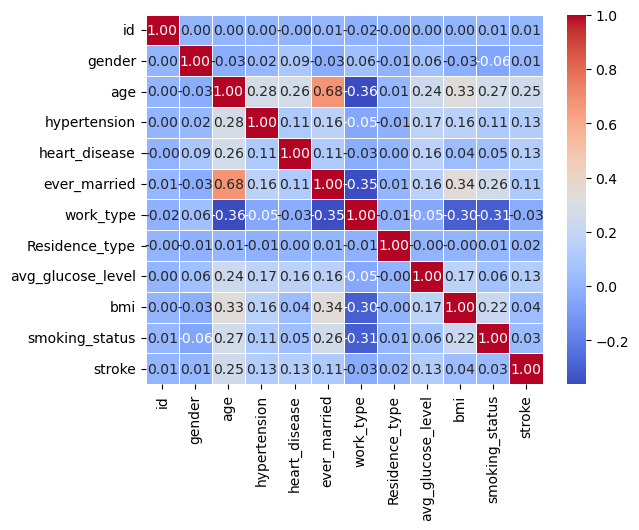

In [41]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [42]:
import pickle

In [43]:
with open('stroke.pkl','wb') as f:
    pickle.dump(lrc, f)